## EDA (Exploratory Data Analysis)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train_df = pd.read_csv("/kaggle/input/regipa/train_regipa.csv")
test_df = pd.read_csv("/kaggle/input/regipa/test_regipa.csv", index_col="Index")

In [2]:
train_df = train_df.drop(columns=['Index','District'])
train_df.head()

,Contents,IPA
0,"লেখিয়্যা, কালি দিয়্যা, সেই সুন্দর করিয়া, এখন স...","lekʰɪʲt̪ɐ, kɐlɪ d̪ɪkt̪ɐ, ʃe͡ɪ̯ ʃund̪ɔɾ koɾɪʲɐ,..."
1,"হ, একটা ফিল্ডিং গ্রুপ ছিলো।","ho, ɛktɐ pʰɪldɪŋ gɾup cʰɪlo।"
2,"হ, ওরে কতা <> বুজচি বিষয়টা, ওয় তো এখনও বেরাজিল...","ho, oɾe kɔt̪ɐ <> buɟcɪ bɪʃɔʲtɐ, oe̯ t̪o ɛkʰono..."
3,"সিডায়, ওই সমায় আমরা ওই কানির রুমটাত যকন আছনো এ...","ʃɪdɐe̯, o͡ɪ̯ ʃɔmɐe̯ ɐmɾɐ o͡ɪ̯ kɐnɪɾ ɾumtɐt̪ ɟɔ..."
4,"যকন কী ইয়্যা হইছিল, ওই যে সুমন আর হইলো আলম <> ...","ɟɔkon kɪ ɪʲlɐ ho͡ɪ̯cʰɪlo, o͡ɪ̯ ɟe ʃumɔn ɐɾ ho͡..."


In [3]:
test_df = test_df.drop(columns=['District'])
test_df.head()

,Contents
Index,
0,এলা সবায় সবার হাতোত <> অসহায় মানুষ আচে?
1,কেউ কারো ইয়া নাই।
2,"এলা ওই যে, কাইলকা ব্যাটায় ইপতারি আনচে, খাইচোং,..."
3,আর মুই আগোত কী করচিনু?
4,"<> আগের কতা বাদ দেও, এলা নাই।"


In [4]:
display(train_df.isna().value_counts())
display(test_df.isna().value_counts())

Contents  IPA  
False     False    30311
Name: count, dtype: int64

Contents
False       8941
Name: count, dtype: int64

In [5]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [6]:
print("Total number of training samples:", len(train_df))
print("Total number of test samples:", len(test_df))

Total number of training samples: 30311
Total number of test samples: 8941


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


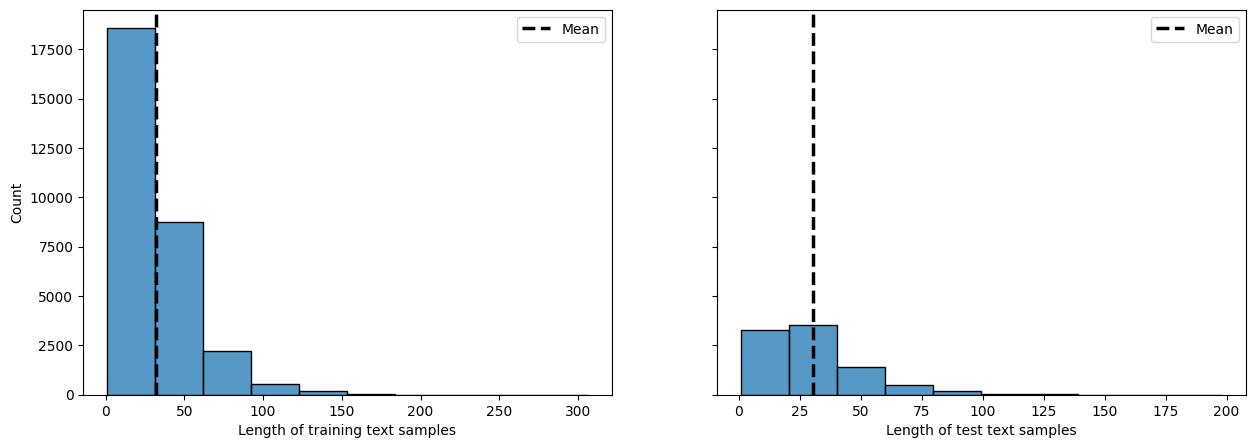

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

train_lengths = train_df["Contents"].str.len()
sns.histplot(ax=axes[0], data=train_lengths, bins=10).set(xlabel="Length of training text samples")
axes[0].axvline(train_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

test_lengths = test_df["Contents"].str.len()
sns.histplot(ax=axes[1], data=test_lengths, bins=10).set(xlabel="Length of test text samples")
axes[1].axvline(test_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[1].legend()


plt.show()

In [8]:
# For calculating WER (Word Error Rate)
! pip install jiwer

## Training

***I used a 10% validation dataset to train the model and at 17000 steps, I achieved a respectable score. So now I will train using nearly the entire training data set while maintaining the same model parameters.***

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.0003, shuffle=True, random_state=3000)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [10]:
len(val_df)

10

In [11]:
from datasets import Dataset

ds_train = Dataset.from_pandas(train_df)
ds_eval = Dataset.from_pandas(val_df)

### Model



**For this dataset, I primarily train with 'google/byt5-small' Transformer. First, I train the model using the 'DataVerse Challenge - ITVerse 2023' competition dataset. Use the model checkpoint to train on this dataset.**


In [12]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

model_id = "/kaggle/input/model-checkpoint-trained-on-dataverse/Model/"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
data_collator = DataCollatorForSeq2Seq(tokenizer)

2024-02-28 07:23:14.018221: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-28 07:23:14.018344: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-28 07:23:14.150420: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.

In [13]:
def prepare_dataset(sample):
    output = tokenizer(sample["Contents"])
    output["labels"] = tokenizer(sample["IPA"])['input_ids']
    output["length"] = len(output["labels"])
    #print(output)
    return output


ds_train = ds_train.map(prepare_dataset, remove_columns=ds_train.column_names)
ds_eval = ds_eval.map(prepare_dataset, remove_columns=ds_eval.column_names)

  0%|          | 0/30301 [00:00<?, ?ex/s]

  0%|          | 0/10 [00:00<?, ?ex/s]

In [14]:
print(ds_train)

Dataset({
    features: ['input_ids', 'attention_mask', 'labels', 'length'],
    num_rows: 30301
})


In [15]:
import numpy as np
from datasets import load_metric

wer_metric = load_metric("wer")


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    
    if isinstance(preds, tuple):
        preds = preds[0]
    
    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"wer": result}

In [16]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

model_id = "bytet5-banglaregional-text-to-ipa-Final"
training_args = Seq2SeqTrainingArguments(
    output_dir=model_id,
    group_by_length=True,
    length_column_name="length",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=4,
    evaluation_strategy="steps",
    metric_for_best_model="wer",
    greater_is_better=False,
    load_best_model_at_end=False,
    num_train_epochs=10,
    max_steps=17000,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=1000,
    learning_rate=3e-4,
    weight_decay=1e-2,
    warmup_steps=1000,
    save_total_limit=3,
    predict_with_generate=True,
    generation_max_length=512,
    push_to_hub=False,
    report_to="none",
)

In [17]:
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_eval,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

Step,Training Loss,Validation Loss,Wer
1000,0.171700,0.044984,0.114754
2000,0.034600,0.023348,0.049180
3000,0.025400,0.015817,0.032787
4000,0.022700,0.009146,0.016393
5000,0.018400,0.015101,0.049180
6000,0.016200,0.010972,0.032787
7000,0.014600,0.026739,0.032787
8000,0.013600,0.008784,0.049180
9000,0.011200,0.015066,0.016393
10000,0.010200,0.004840,0.016393


TrainOutput(global_step=17000, training_loss=0.022387289243585923, metrics={'train_runtime': 10186.0651, 'train_samples_per_second': 26.703, 'train_steps_per_second': 1.669, 'total_flos': 4.642339510447949e+16, 'train_loss': 0.022387289243585923, 'epoch': 8.98})

In [18]:
trainer.save_model(model_id)